# Minimal Example using TensorFlow 
In this notebook we will recreate the minimal Model using TensorFlow

### Importing Libraries

In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

2024-11-20 19:10:25.553131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732110025.699053   11433 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732110025.743016   11433 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 19:10:26.024594: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.18.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Data Generation 
we will generate the fake data like in the basic NN notebook. Please refer that to understand the whole process

In [3]:
np.random.seed(42)
observations = 100000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs -3*zs + 5 + noise

# This savez function will save multiple n-D arrays into one single file with ".npz" extension 
np.savez("TF_intro_2", inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow

In [4]:
# Loading the Data from "npz" files 
training_data = np.load("TF_intro_2.npz")

In [5]:
# we declare input and output size 
# Since we have 2 independent variables we have input size 2
input_size = 2 

# Since we have 1 dependent variables we have output size 
output_size = 1

`Sequential` function uses to create a model will be laid down i.e. stacks layers

`Dense` method takes the inputs to the model and dot product the inputs and add it with bias which is actual linear model does


In [6]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                  kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                  bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
])

Now we got the model and need the optimization method

TF provides the method `compile` where we can specify which optimization technique we going to use 

Here we use **SGD-Stochastic Gradient Descent** which a for of Gradient Descent itself and for Loss function we use L2-norm fuction which is the **Mean Squared Error function**

In [7]:
# custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer='sgd', loss='mean_squared_error')
# model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

I0000 00:00:1732110036.863609   11433 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2605 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


Now we will fit the model using `fit` function

We use `Epochs` which is the number times that the learning algorithm will work through the entire training dataset and `verbose` which the info while training the model usually we set verbose to 1 to know how the model performs in training in each iteration

In [8]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100


I0000 00:00:1732110048.752515   11514 service.cc:148] XLA service 0x7f9588165320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732110048.752807   11514 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
I0000 00:00:1732110048.794560   11514 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1732110049.217175   11514 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3125/3125 - 5s - 1ms/step - loss: 0.7047
Epoch 2/100
3125/3125 - 4s - 1ms/step - loss: 0.3443
Epoch 3/100
3125/3125 - 4s - 1ms/step - loss: 0.3445
Epoch 4/100
3125/3125 - 5s - 2ms/step - loss: 0.3443
Epoch 5/100
3125/3125 - 5s - 1ms/step - loss: 0.3444
Epoch 6/100
3125/3125 - 7s - 2ms/step - loss: 0.3442
Epoch 7/100
3125/3125 - 2s - 488us/step - loss: 0.3448
Epoch 8/100
3125/3125 - 2s - 515us/step - loss: 0.3447
Epoch 9/100
3125/3125 - 2s - 507us/step - loss: 0.3443
Epoch 10/100
3125/3125 - 2s - 557us/step - loss: 0.3441
Epoch 11/100
3125/3125 - 2s - 543us/step - loss: 0.3442
Epoch 12/100
3125/3125 - 2s - 667us/step - loss: 0.3441
Epoch 13/100
3125/3125 - 2s - 578us/step - loss: 0.3444
Epoch 14/100
3125/3125 - 2s - 561us/step - loss: 0.3448
Epoch 15/100
3125/3125 - 2s - 611us/step - loss: 0.3446
Epoch 16/100
3125/3125 - 2s - 499us/step - loss: 0.3446
Epoch 17/100
3125/3125 - 2s - 483us/step - loss: 0.3441
Epoch 18/100
3125/3125 - 2s - 497us/step - loss: 0.3440
Epoch 19/100
3125/3125 - 

### Extract weights and bias

we can use the build in methods to get the values of weights and bias

In [9]:
model.layers[0].get_weights()

[array([[ 1.9819934],
        [-2.993531 ]], dtype=float32),
 array([4.999803], dtype=float32)]

### Predicting the outputs

In [10]:
predictions = model.predict_on_batch(training_data['inputs'])

### Plotting the targets vs predictions

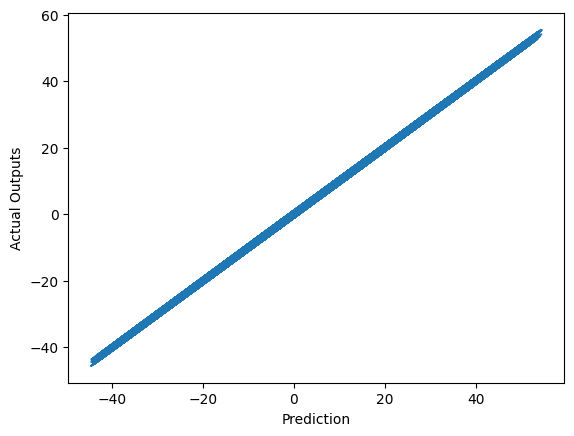

In [11]:
plt.plot(np.squeeze(predictions), np.squeeze(training_data['targets']))
plt.xlabel('Prediction')
plt.ylabel('Actual Outputs')
plt.show()